In [1]:
import numpy as np  
import pandas as pd  
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
import math
doverie = 0.95
dispersia = 225
Delta  = 3
a=0.05
normrasp = 1-a/2
z = 1.96
sigma =math.sqrt(dispersia)
N = int(((sigma*z)/Delta)**2)
N


96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [3]:

n = 25
avverage  = 130
sigma = 15  
a=0.02
sqrt = math.sqrt(n)
normrasp = 1-a/2
z = 2.33
toch = sigma/sqrt * z
dlinadovint = (avverage+toch) - (avverage-toch)
round (dlinadovint) 

14

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [16]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

t, p_value = stats.ttest_ind(mens, womens)
t, p_value


(3.6635841716708892, 0.00024875321033580573)

In [5]:
stats.ttest_ind(mens, womens, equal_var = False)

Ttest_indResult(statistic=3.6635841716708897, pvalue=0.00024875321039012085)

In [6]:
#Даже если принять pvalue=0.001, то результат выше однозначно показывает  различие между выборками очень и очень незначительно
#отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны

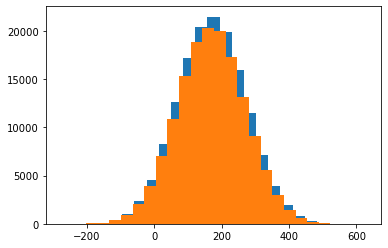

In [7]:
plt.hist(mens, bins=25); 
plt.hist(womens, bins=25);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [8]:
doverie = 0.95
sigma = 150
Delta  = 50
a=0.05
normrasp = 1-a/2
z = 1.96
N = int(((sigma*z)/Delta)**2)
N

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [9]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [59]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [ ]:
#полученное в нашем примере значение 0,35 и есть уровень значимости различий.  
#P > 0,05, в связи с чем делаем вывод что нулевая гипотеза верна, то есть предсказания случайны

In [ ]:
# Нашла на сайте расчет https://www.psychol-ok.ru/statistics/fisher/fisher_02.html 
#Полученное эмпирическое значение φ* находится в зоне незначимости. Н1 отвергается φ*эмп = 1.165 Как рассчитывать это в Питон?
#мы рассчитали точный критерий Фишера,но надо его сравнить с критическим. это таблицы, как ими пользоваться? 


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [10]:
def mean_confidence_interval(data, confidence=0.90):
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h 


In [12]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.067980858414457, 6.628571428571429, 7.189161998728401)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [39]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:
averA =sum(A) / len(A)
averB =sum(B) / len(B)
scaleA = np.var(A)
scaleB = np.var(B, ddof=1)
print(averA,averB,scaleA,scaleB,len(A),len(B))

6.446428571428571 4.147368421052631 1.8007015306122451 2.0631578947368423 112 95


In [41]:
A  = stats.norm.rvs(loc=6.44, scale=1.8, size=112)  
B = stats.norm.rvs(loc=4.14, scale=2.06, size=95)  

t, p_value = stats.ttest_ind(mens, womens)
p_value

0.00024875321033580573

In [ ]:
#Выборки отличаются и одному множеству не принадлежат

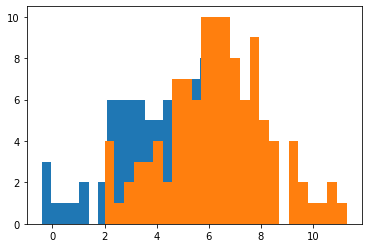

In [42]:
plt.hist(B, bins=25); 
plt.hist(A, bins=25);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:Р-значение 0,03 означает, что есть 3% (вероятность в процентах),Нулевая гипотеза не верна

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [19]:
#тип данных - количественные, распределение неизвестно, группы не связаны - используем t-Тест Стьдента

np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

t, p_value = stats.ttest_ind(B, A)
t, p_value


(1.95300880485141, 0.051284593140469285)

In [ ]:
#Выборки отличаются, но незначительно. При p-value 0,001, что лучше сделать, раз речь идет о лекарствах - выборки НЕ отличаются
#Вообще прочитала, что если мы проверяем 20 гипотез  одновременно, 
#то пороговое значение должно снизиться в 20 раз, 0,05,20 = 0,0025

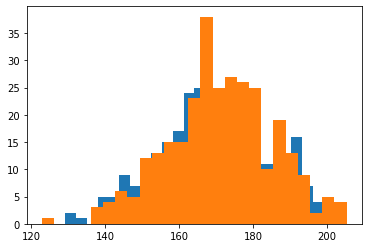

In [20]:
plt.hist(A, bins=25); 
plt.hist(B, bins=25);

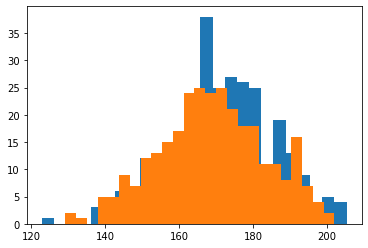

In [21]:
plt.hist(B, bins=25); 
plt.hist(A, bins=25);